In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data = pd.read_csv("results.csv")
data = data.round(4)

In [3]:
data.head(10)

,model,mAP,mAP_COCO,inference,FPS
0,yolov3,0.9949,0.8862,0.0312,32.0075
1,yolov3-tiny,0.9863,0.7198,0.0156,64.0144
2,yolov5l,0.9950,0.8757,0.0312,32.0077
3,yolov5m,0.9949,0.8553,0.0156,64.0172
4,yolov5n,0.9907,0.7586,0.0156,64.0166
5,yolov5s,0.9947,0.8278,0.0156,64.0139
6,yolov5x,0.9950,0.8824,0.0469,21.3386


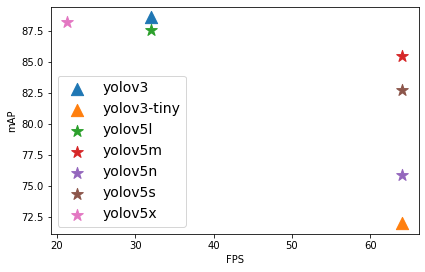

In [4]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
plt.rcParams.update({'font.size': 14})

for index, row in data.iterrows():
    marker = '^' #'^' #'8'
    if row['model'].startswith('yolov3'):
        marker = '^'
    elif row['model'].startswith('yolov5'):
        marker= '*'
        
    ax.scatter(row['FPS'], row['mAP_COCO']*100, label=row['model'], marker=marker, s=150, zorder=1)
    
ax.set_xlabel('FPS')
ax.set_ylabel('mAP')
plt.legend()
plt.tight_layout()

plt.savefig('img_yolo.png', bbox_inches='tight', dpi=600)
plt.show()

In [5]:
columns = [
    'model', 'precision', 'recall', 'mAP_05', 'mAP_05_095', 'inference', 'FPS'
]
table = pd.DataFrame(columns = columns)
for folder in os.listdir('yolo/yolov5/runs/train'):   
    results = pd.read_csv('yolo/yolov5/runs/train/'+folder+'/results.csv')
    row = [{
        'model': folder,
        'precision': float(results.iloc[49].values[4])*100.,
        'recall': float(results.iloc[49].values[5])*100.,
        'mAP_05': float(results.iloc[49].values[6])*100.,
        'mAP_05_095': float(results.iloc[49].values[7])*100.,
        'inference': data[data['model']==folder].values[0][3]*100,
        'FPS': data[data['model']==folder].values[0][4]
    }]
    df = pd.DataFrame(row)
    table = pd.concat([table, df])
table.to_csv('yolo_results.csv', index=False)

In [6]:
table.head()

,model,precision,recall,mAP_05,mAP_05_095,inference,FPS
0,yolov3,99.351,99.555,99.489,88.625,3.12,32.0075
0,yolov3-tiny,94.863,94.971,98.633,71.984,1.56,64.0144
0,yolov5l,99.47,99.612,99.496,87.571,3.12,32.0077
0,yolov5m,99.171,99.518,99.486,85.527,1.56,64.0172
0,yolov5n,95.884,96.134,99.067,75.859,1.56,64.0166


In [7]:
with open('results_by_model.tex', 'w') as tf:
     tf.write(table.to_latex())

C:\Users\virgi\AppData\Local\Temp\ipykernel_17664\168987356.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(table.to_latex())
